In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import sys, os 
src_path = os.path.abspath('../../../')
sys.path.append(src_path)

plans_path = os.path.abspath('../solutions')

from acc_2021.penumatic_hopper.config_penumatic_hopper import *
import scipy.linalg as scl

from utils.simulation import visualize



import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as m_lines
import matplotlib.patches as m_patches
from matplotlib.collections import PatchCollection


In [2]:
# load ddp results
ddp_xsim = np.load("ddp/ddp_xsim.npy")
ddp_xhsim= np.load("ddp/ddp_xhsim.npy") 
ddp_usim= np.load("ddp/ddp_usim.npy")
ddp_Ksim = np.load("ddp/ddp_Ksim.npy") 
ddp_fsim = np.load("ddp/ddp_fsim.npy") 
# load risk averse results sigma = -0.5 
averse_xsim = np.load("risk_averse/averse_xsim.npy")
averse_xhsim= np.load("risk_averse/averse_xhsim.npy") 
averse_usim= np.load("risk_averse/averse_usim.npy")
averse_Ksim_ = np.load("risk_averse/averse_Ksim.npy") 
averse_fsim = np.load("risk_averse/averse_fsim.npy") 
# load risk seeking results sigma = 10. 
seeking_xsim = np.load("risk_seeking/seeking_xsim.npy")
seeking_xhsim= np.load("risk_seeking/seeking_xhsim.npy") 
seeking_usim= np.load("risk_seeking/seeking_usim.npy")
seeking_Ksim_ = np.load("risk_seeking/seeking_Ksim.npy") 
seeking_fsim = np.load("risk_seeking/seeking_fsim.npy") 



# load plans 
ddp_xplan = np.load(plans_path+"/ddp_xs.npy")
ddp_uplan = np.load(plans_path+"/ddp_us.npy")
ddp_Kplan = np.load(plans_path+"/ddp_K.npy")

averse_xplan = np.load(plans_path+"/risk_averse/iRiSC_xs.npy")
averse_uplan = np.load(plans_path+"/risk_averse/iRiSC_us.npy")
averse_Kplan_ = np.load(plans_path+"/risk_averse/iRiSC_K.npy")

seeking_xplan = np.load(plans_path+"/risk_seeking/iRiSC_xs.npy")
seeking_uplan = np.load(plans_path+"/risk_seeking/iRiSC_us.npy")
seeking_Kplan_ = np.load(plans_path+"/risk_seeking/iRiSC_K.npy")

averse_Ksim = np.zeros([1000, 200, 4])
seeking_Ksim = np.zeros([1000, 200, 4])
averse_Kplan = np.zeros([200,4])
seeking_Kplan = np.zeros([200,4])
for i in range(1000):
    for t in range(200):
        averse_Ksim[i,t,:] = averse_Ksim_[i,t,0,:]
        seeking_Ksim[i,t,:] = seeking_Ksim_[i,t,0,:]
        if i == 0:
            seeking_Kplan[i,:] = seeking_Kplan_[i,0,:]
            averse_Kplan[i,:] = averse_Kplan_[i,0,:]

print(seeking_xplan.shape)


(201, 4)


In [3]:
state_names = ["$q^h$","$q^f$","$v^h$","$v^f$" ]
# first compute foot absolute positions and velocities 

time_array = plan_dt*np.arange(horizon+1)
ddp_foot_planned = ddp_xplan[:,0] - ddp_xplan[:,1] - .5*np.ones_like(time_array)
ddp_foot_actual = ddp_xsim[:,:,0] - ddp_xsim[:,:,1] - .5*np.ones_like(time_array)
ddp_foot_estimated = ddp_xhsim[:,:,0] - ddp_xhsim[:,:,1] - .5*np.ones_like(time_array)


averse_foot_planned =averse_xplan[:,0] - averse_xplan[:,1] - .5*np.ones_like(time_array)
averse_foot_actual = averse_xsim[:,:,0] - averse_xsim[:,:,1] - .5*np.ones_like(time_array)
averse_foot_estimated = averse_xhsim[:,:,0] - averse_xhsim[:,:,1] - .5*np.ones_like(time_array)


seeking_foot_planned = seeking_xplan[:,0] - seeking_xplan[:,1] - .5*np.ones_like(time_array)
seeking_foot_actual = seeking_xsim[:,:,0] - seeking_xsim[:,:,1] - .5*np.ones_like(time_array)
seeking_foot_estimated = seeking_xhsim[:,:,0] - seeking_xhsim[:,:,1] - .5*np.ones_like(time_array)




## Simulation Mean

In [4]:
# compute mean
ddp_xsim_mean = np.mean(ddp_xsim, axis=0)
ddp_xhsim_mean = np.mean(ddp_xhsim, axis=0)
ddp_usim_mean = np.mean(ddp_usim, axis=0)
ddp_Ksim_mean = np.mean(ddp_Ksim, axis=0)
ddp_fsim_mean = np.mean(ddp_fsim, axis=0)
ddp_foot_actual_mean = np.mean(ddp_foot_actual, axis=0)
ddp_foot_estimated_mean = np.mean(ddp_foot_estimated, axis=0)

averse_xsim_mean = np.mean(averse_xsim, axis=0)
averse_xhsim_mean = np.mean(averse_xhsim, axis=0)
averse_usim_mean = np.mean(averse_usim, axis=0)
averse_Ksim_mean = np.mean(averse_Ksim, axis=0)
averse_fsim_mean = np.mean(averse_fsim, axis=0)
averse_foot_actual_mean = np.mean(averse_foot_actual, axis=0)
averse_foot_estimated_mean = np.mean(averse_foot_estimated, axis=0)

seeking_xsim_mean = np.mean(seeking_xsim, axis=0)
seeking_xhsim_mean = np.mean(seeking_xhsim, axis=0)
seeking_usim_mean = np.mean(seeking_usim, axis=0)
seeking_Ksim_mean = np.mean(seeking_Ksim, axis=0)
seeking_fsim_mean = np.mean(seeking_fsim, axis=0)
seeking_foot_actual_mean = np.mean(seeking_foot_actual, axis=0)
seeking_foot_estimated_mean = np.mean(seeking_foot_estimated, axis=0)

print(ddp_usim_mean.shape)
print(averse_usim_mean.shape)


(200, 1)
(200, 1)


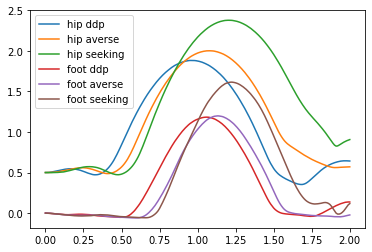

In [5]:
plt.figure("average trajectory")
plt.plot(time_array, ddp_xsim_mean[:,0], label="hip ddp")
plt.plot(time_array, averse_xsim_mean[:,0], label="hip averse")
plt.plot(time_array, seeking_xsim_mean[:,0], label="hip seeking")
plt.plot(time_array, ddp_foot_actual_mean[:], label="foot ddp")
plt.plot(time_array, averse_foot_actual_mean[:], label="foot averse")
plt.plot(time_array, seeking_foot_actual_mean[:], label="foot seeking")
plt.legend()

## Simulation Standard Deviation 

In [6]:
ddp_xsim_std = np.std(ddp_xsim, axis=0)
ddp_xhsim_std = np.std(ddp_xhsim, axis=0)
ddp_usim_std = np.std(ddp_usim, axis=0)
ddp_Ksim_std = np.std(ddp_Ksim, axis=0)
ddp_fsim_std = np.std(ddp_fsim, axis=0)
ddp_foot_actual_std = np.std(ddp_foot_actual, axis=0)
ddp_foot_estimated_std = np.std(ddp_foot_estimated, axis=0)

averse_xsim_std = np.std(averse_xsim, axis=0)
averse_xhsim_std = np.std(averse_xhsim, axis=0)
averse_usim_std = np.std(averse_usim, axis=0)
averse_Ksim_std = np.std(averse_Ksim, axis=0)
averse_fsim_std = np.std(averse_fsim, axis=0)
averse_foot_actual_std = np.std(averse_foot_actual, axis=0)
averse_foot_estimated_std = np.std(averse_foot_estimated, axis=0)

seeking_xsim_std = np.std(seeking_xsim, axis=0)
seeking_xhsim_std = np.std(seeking_xhsim, axis=0)
seeking_usim_std = np.std(seeking_usim, axis=0)
seeking_Ksim_std = np.std(seeking_Ksim, axis=0)
seeking_fsim_std = np.std(seeking_fsim, axis=0)
seeking_foot_actual_std = np.std(seeking_foot_actual, axis=0)
seeking_foot_estimated_std = np.std(seeking_foot_estimated, axis=0)

print(ddp_usim_std.shape)
print(averse_usim_std.shape)

(200, 1)
(200, 1)


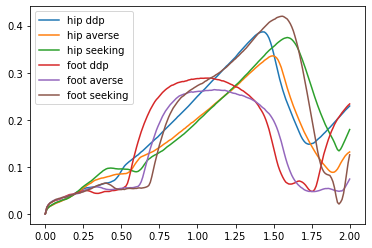

In [7]:
plt.figure("standard deviation of trajectory")
plt.plot(time_array, ddp_xsim_std[:,0], label="hip ddp")
plt.plot(time_array, averse_xsim_std[:,0], label="hip averse")
plt.plot(time_array, seeking_xsim_std[:,0], label="hip seeking")
plt.plot(time_array, ddp_foot_actual_std[:], label="foot ddp")
plt.plot(time_array, averse_foot_actual_std[:], label="foot averse")
plt.plot(time_array, seeking_foot_actual_std[:], label="foot seeking")
plt.legend()

## Estimation Mean & Standard Deviation Plots

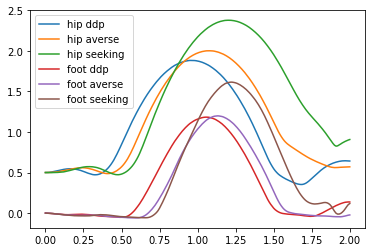

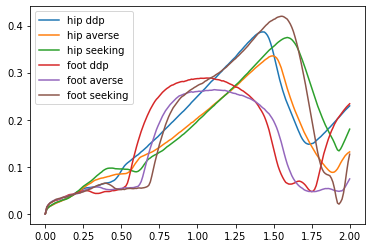

In [8]:
plt.figure("estimation mean trajectory")
plt.plot(time_array, ddp_xhsim_mean[:,0], label="hip ddp")
plt.plot(time_array, averse_xhsim_mean[:,0], label="hip averse")
plt.plot(time_array, seeking_xhsim_mean[:,0], label="hip seeking")
plt.plot(time_array, ddp_foot_estimated_mean[:], label="foot ddp")
plt.plot(time_array, averse_foot_estimated_mean[:], label="foot averse")
plt.plot(time_array, seeking_foot_estimated_mean[:], label="foot seeking")
plt.legend()


plt.figure("estimation standard deviation trajectory")
plt.plot(time_array, ddp_xhsim_std[:,0], label="hip ddp")
plt.plot(time_array, averse_xhsim_std[:,0], label="hip averse")
plt.plot(time_array, seeking_xhsim_std[:,0], label="hip seeking")
plt.plot(time_array, ddp_foot_estimated_std[:], label="foot ddp")
plt.plot(time_array, averse_foot_estimated_std[:], label="foot averse")
plt.plot(time_array, seeking_foot_estimated_std[:], label="foot seeking")
plt.legend()

# Norm of Feedback Gains

In [9]:
averse_Kp_mean = []
averse_Kd_mean = []
seeking_Kp_mean = []
seeking_Kd_mean = []
for i in range(200):
    averse_Kp_mean += [scl.norm(averse_Ksim_mean[:,:2])]
    averse_Kd_mean += [scl.norm(averse_Ksim_mean[:,2:])]
    seeking_Kp_mean += [scl.norm(seeking_Ksim_mean[:,:2])]
    seeking_Kd_mean += [scl.norm(seeking_Ksim_mean[:,2:])]

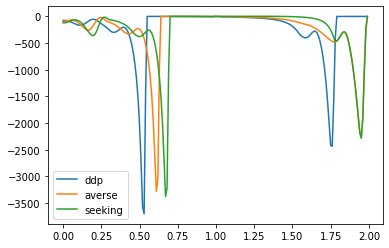

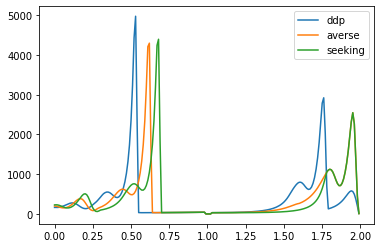

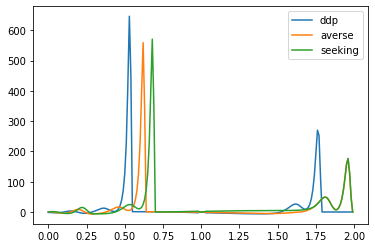

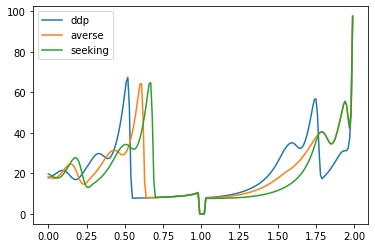

In [10]:
plt.figure(" Kd %s"%state_names[0])
plt.plot(time_array[:-1], ddp_Ksim_mean[:,0], label="ddp")
plt.plot(time_array[:-1], averse_Ksim_mean[:,0], label="averse")
plt.plot(time_array[:-1], seeking_Ksim_mean[:,0], label="seeking")
plt.legend()

plt.figure(" Kd %s"%state_names[1])
plt.plot(time_array[:-1], ddp_Ksim_mean[:,1], label="ddp")
plt.plot(time_array[:-1], averse_Ksim_mean[:,1], label="averse")
plt.plot(time_array[:-1], seeking_Ksim_mean[:,1], label="seeking")
plt.legend()


plt.figure(" Kp %s"%state_names[2])
plt.plot(time_array[:-1], ddp_Ksim_mean[:,2], label="ddp")
plt.plot(time_array[:-1], averse_Ksim_mean[:,2], label="averse")
plt.plot(time_array[:-1], seeking_Ksim_mean[:,2], label="seeking")
plt.legend()

plt.figure(" Kp %s"%state_names[3])
plt.plot(time_array[:-1], ddp_Ksim_mean[:,3], label="ddp")
plt.plot(time_array[:-1], averse_Ksim_mean[:,3], label="averse")
plt.plot(time_array[:-1], seeking_Ksim_mean[:,3], label="seeking")
plt.legend()

## Contact Force Statistics

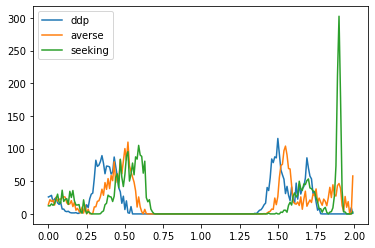

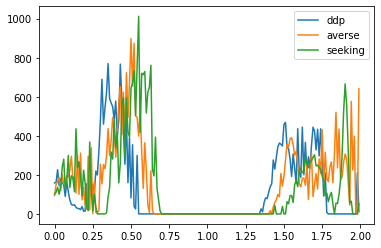

In [11]:
plt.figure("average contact forces")
plt.plot(time_array[:-1], ddp_fsim_mean[:], label="ddp")
plt.plot(time_array[:-1], averse_fsim_mean[:], label="averse")
plt.plot(time_array[:-1], seeking_fsim_mean[:], label="seeking")
plt.legend()


plt.figure("standard deviation contact forces")
plt.plot(time_array[:-1], ddp_fsim_std[:], label="ddp")
plt.plot(time_array[:-1], averse_fsim_std[:], label="averse")
plt.plot(time_array[:-1], seeking_fsim_std[:], label="seeking")
plt.legend()

## Tracking Errors 

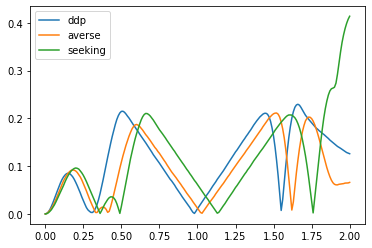

In [12]:
ddp_mean_tracking = np.abs(ddp_xsim_mean - ddp_xplan)
averse_mean_tracking = np.abs(averse_xsim_mean - averse_xplan)
seeking_mean_tracking = np.abs(seeking_xsim_mean - seeking_xplan)

plt.figure("hip tracking error mean")
plt.plot(time_array, ddp_mean_tracking[:,0], label="ddp")
plt.plot(time_array, averse_mean_tracking[:,0], label="averse")
plt.plot(time_array, seeking_mean_tracking[:,0], label="seeking")
plt.legend()

# Trajectory Statistics 

In [13]:
def plot_statistics_hip(means, stds, title, labels, legends= False, save=False):
    """ a function that plots trajectory stats"""
    plt.figure(title, figsize=(12,8))
    plt.ylim((-.2, 2.7))
    colors = ["b", "g", "r"]
    xaxis_array = plan_dt*np.arange(means[0].shape[0])
    desired_height = 2.*np.ones_like(xaxis_array)
#     rest_height = 0.*np.ones_like(xaxis_array)
    ax = plt.axes()
    ax.add_patch(m_patches.Rectangle(
    (-.01, -0.2),2., .2,
    fill=False,
    hatch='/',
    ))
    plt.plot(xaxis_array, desired_height, '--k',linewidth=2.)
#     plt.plot(xaxis_array, rest_height, '--k',linewidth=2.)
    for i in range(len(means)):
        plt.plot(xaxis_array, means[i], alpha=1., color=colors[i], linewidth=2., label=labels[i])
        plt.fill_between(xaxis_array, means[i]-stds[i], means[i]+stds[i], alpha=.15, color=colors[i])
    plt.xlabel("time [s]", fontsize=20.)
    plt.ylabel(title, fontsize=20.)
    plt.xticks(fontsize=15.)
    plt.yticks(fontsize=15.)
    if legends:
        plt.legend(loc='upper left', fontsize=20.)
    if save:
        plt.savefig(title+".pdf")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


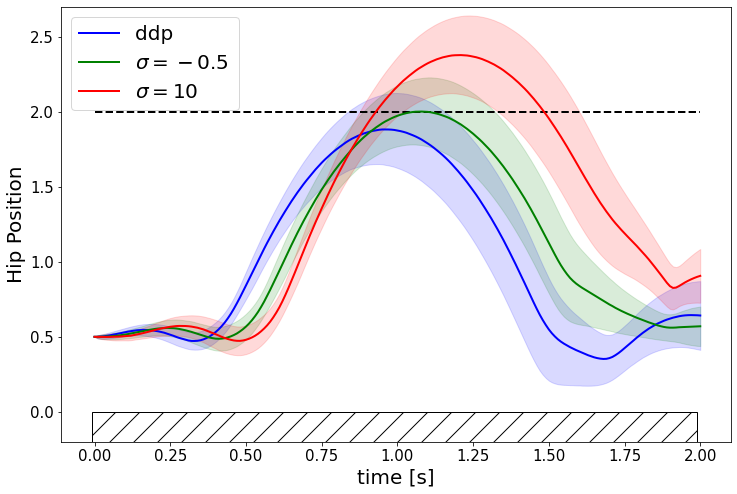

In [14]:
means = [ddp_xsim_mean[:,0], averse_xsim_mean[:,0], seeking_xsim_mean[:,0]]
stds = [ddp_xsim_std[:,0], averse_xsim_std[:,0], seeking_xsim_std[:,0]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_hip(means, stds, "Hip Position", labels, True, True)

In [16]:
def plot_statistics_foot(means, stds, title, labels, legends= False, save=False):
    """ a function that plots trajectory stats"""
    plt.figure(title, figsize=(12,8))
    plt.ylim((-.2, 2.7))
    colors = ["b", "g", "r"]
    xaxis_array = plan_dt*np.arange(means[0].shape[0])
    desired_height = 1.5*np.ones_like(xaxis_array)
#     rest_height = 0.*np.ones_like(xaxis_array)
#     plt.plot(xaxis_array, desired_height, '--k',linewidth=2.)
#     plt.plot(xaxis_array, rest_height, '--k',linewidth=2.)
    ax = plt.axes()
    ax.add_patch(m_patches.Rectangle(
    (-.01, -0.2),2., .2,
    fill=False,
    hatch='/',
    ))
    for i in range(len(means)):
        plt.plot(xaxis_array, means[i], alpha=1., color=colors[i], linewidth=2., label=labels[i])
        plt.fill_between(xaxis_array, means[i]-stds[i], means[i]+stds[i], alpha=.15, color=colors[i])
    plt.xlabel("time [s]", fontsize=20.)
    plt.ylabel(title, fontsize=20.)
    plt.xticks(fontsize=15.)
    plt.yticks(fontsize=15.)
    if legends:
        plt.legend(loc='upper left', fontsize=20.)
    if save:
        plt.savefig(title+".pdf")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


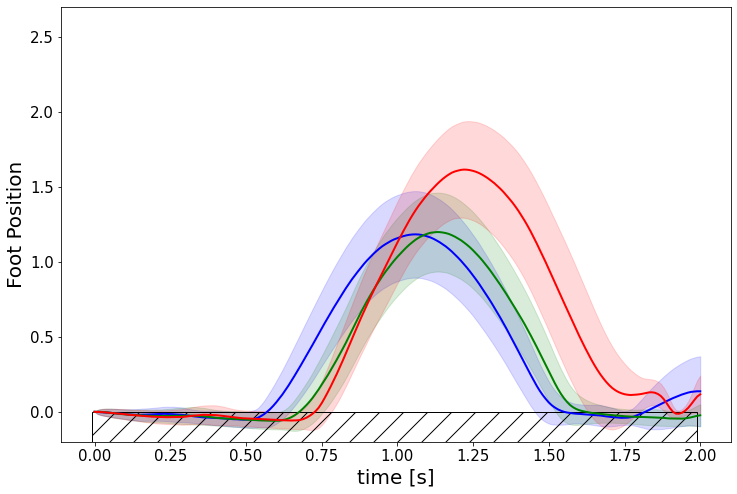

In [17]:
means = [ddp_foot_actual_mean, averse_foot_actual_mean, seeking_foot_actual_mean]
stds = [ddp_foot_actual_std, averse_foot_actual_std, seeking_foot_actual_std]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_foot(means, stds, "Foot Position", labels, False, True)

In [18]:
def plot_statistics_velocity(means, stds, title, labels, save=False, legends=False):
    """ a function that plots trajectory stats"""
    plt.figure(title, figsize=(12,8))
    colors = ["b", "g", "r"]
    xaxis_array = plan_dt*np.arange(means[0].shape[0])
    for i in range(len(means)):
        plt.plot(xaxis_array, means[i], alpha=1., color=colors[i], linewidth=2., label=labels[i])
        plt.fill_between(xaxis_array, means[i]-stds[i], means[i]+stds[i], alpha=.15, color=colors[i])
    plt.xlabel("time [s]", fontsize=20.)
    plt.ylabel(title, fontsize=20.)
    plt.xticks(fontsize=15.)
    plt.yticks(fontsize=15.)
    if legends:
        plt.legend(loc='upper left', fontsize=20.)
#     plt.legend()
    if save:
        plt.savefig(title+".pdf")


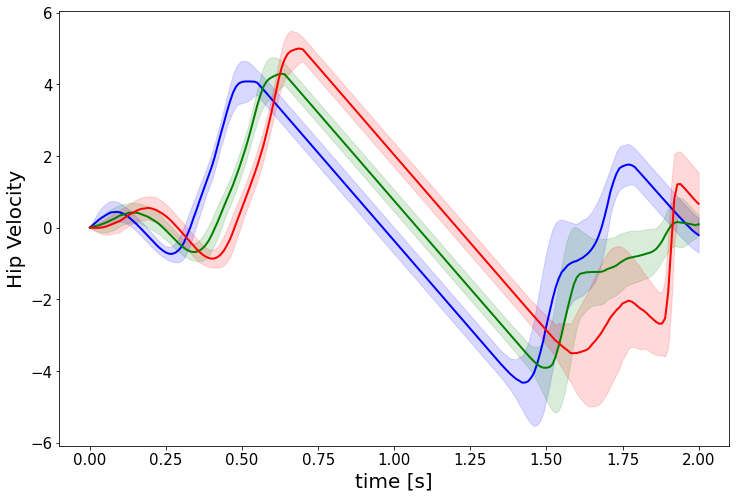

In [19]:
means = [ddp_xsim_mean[:,2],averse_xsim_mean[:,2], seeking_xsim_mean[:,2]]
stds = [ddp_xsim_std[:,2], averse_xsim_std[:,2], seeking_xsim_std[:,2]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Hip Velocity", labels,True)

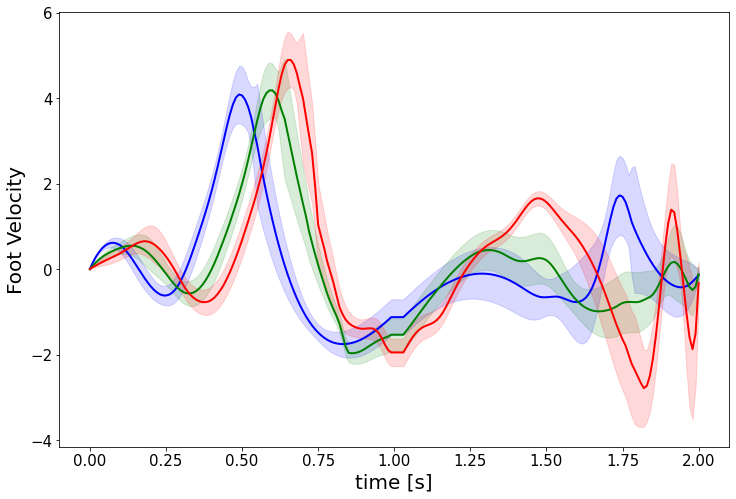

In [20]:
means = [ddp_xsim_mean[:,3],averse_xsim_mean[:,3], seeking_xsim_mean[:,3]]
stds = [ddp_xsim_std[:,3], averse_xsim_std[:,3], seeking_xsim_std[:,3]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Foot Velocity", labels, True)

# Error Statistics 

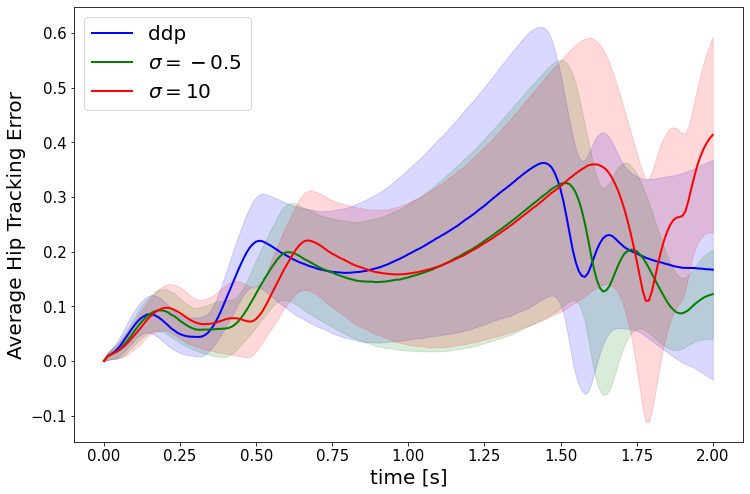

In [21]:
ddp_tracking = np.abs(ddp_xsim[:] - ddp_xplan) 
averse_tracking = np.abs(averse_xsim[:] - averse_xplan)
seeking_tracking = np.abs(seeking_xsim[:] - seeking_xplan) 

ddp_tracking_mean = np.mean(ddp_tracking, axis=0)
averse_tracking_mean = np.mean(averse_tracking, axis=0)
seeking_tracking_mean = np.mean(seeking_tracking, axis=0)

ddp_tracking_std = np.std(ddp_tracking, axis=0)
averse_tracking_std = np.std(averse_tracking, axis=0)
seeking_tracking_std = np.std(seeking_tracking, axis=0)


means = [ddp_tracking_mean[:,0],averse_tracking_mean[:,0], seeking_tracking_mean[:,0]]
stds = [ddp_tracking_std[:,0],averse_tracking_std[:,0], seeking_tracking_std[:,0]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Average Hip Tracking Error", labels, True, True)


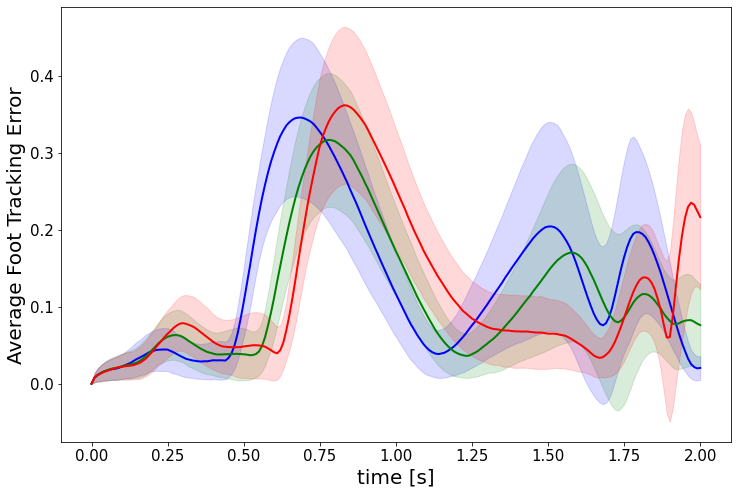

In [22]:
means = [ddp_tracking_mean[:,1],averse_tracking_mean[:,1], seeking_tracking_mean[:,1]]
stds = [ddp_tracking_std[:,1],averse_tracking_std[:,1], seeking_tracking_std[:,1]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Average Foot Tracking Error", labels, True, False)


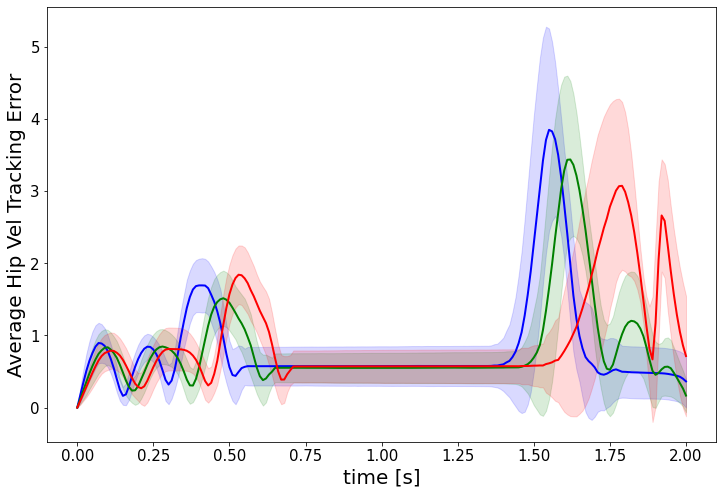

In [23]:
means = [ddp_tracking_mean[:,2],averse_tracking_mean[:,2], seeking_tracking_mean[:,2]]
stds = [ddp_tracking_std[:,2],averse_tracking_std[:,2], seeking_tracking_std[:,2]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Average Hip Vel Tracking Error", labels, True)

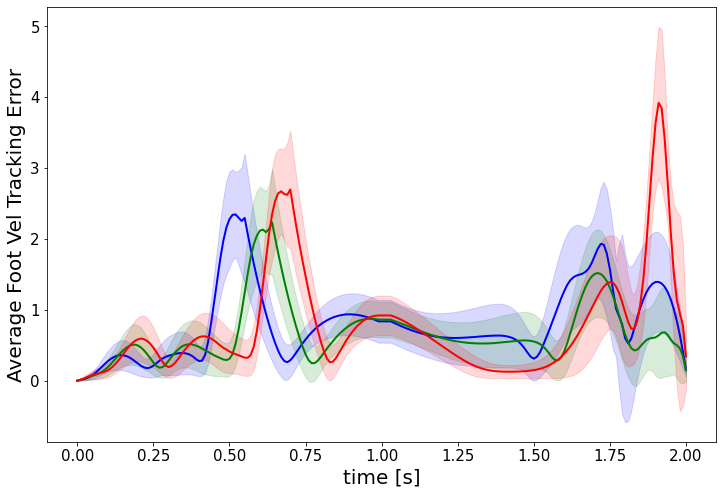

In [24]:
means = [ddp_tracking_mean[:,3],averse_tracking_mean[:,3], seeking_tracking_mean[:,3]]
stds = [ddp_tracking_std[:,3],averse_tracking_std[:,3], seeking_tracking_std[:,3]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
# len(means)
# len(stds)
plot_statistics_velocity(means, stds, "Average Foot Vel Tracking Error", labels, True)

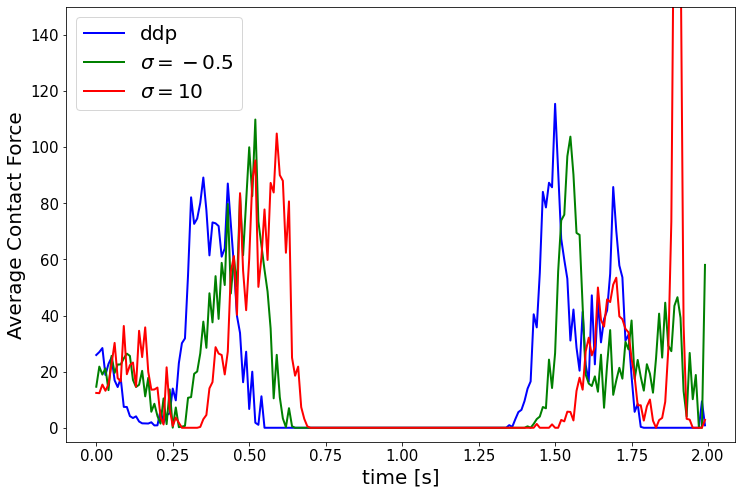

In [25]:
plt.figure("average contact forces", figsize=(12,8))
plt.ylim((-5.,150.))
plt.plot(time_array[:-1], ddp_fsim_mean[:], 'b', linewidth=2., label="ddp")
plt.plot(time_array[:-1], averse_fsim_mean[:],'g', linewidth=2., label="$\sigma= -0.5$")
plt.plot(time_array[:-1], seeking_fsim_mean[:],'r', linewidth=2., label="$\sigma= 10.$")
plt.xlabel("time [s]", fontsize=20.)
plt.ylabel("Average Contact Force", fontsize=20.)
plt.xticks(fontsize=15.)
plt.yticks(fontsize=15.)
plt.legend(loc='upper left', fontsize=20.)
title = "Average Contact Force"
plt.savefig(title+".pdf")


In [26]:
def plot_feedback_statistics(means, stds, title, labels, save=False, legends=False):
    """ a function that plots trajectory stats"""
    plt.figure(title, figsize=(12,8))
    colors = ["b", "g", "r"]
    xaxis_array = plan_dt*np.arange(means[0].shape[0])
    for i in range(len(means)):
        plt.plot(xaxis_array, means[i], alpha=1., color=colors[i], linewidth=2., label=labels[i])
        plt.fill_between(xaxis_array, means[i]-stds[i], means[i]+stds[i], alpha=.15, color=colors[i])
    plt.xlabel("time [s]", fontsize=20.)
    plt.xticks(fontsize=15.)
    plt.yticks(fontsize=15.)
    plt.ylabel(title, fontsize=20.)
    if legends:
        plt.legend(loc='upper left', fontsize=20.)
    if save:
        plt.savefig(title+".pdf")


# means = [ddp_Ksim_mean[:,0], averse_Ksim_mean[:,0], seeking_Ksim_mean[:,0]]
# stds = [ddp_Ksim_std[:,0], averse_Ksim_std[:,0], seeking_Ksim_std[:,0]]
# labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
        
# plot_feedback_statistics(means, stds, "Hip Position Feedback", labels)

# colors = ["b", "g", "r"]
# plt.figure("Hip Position feedback deviation", figsize=(12,8))
# for i in range(3):
#     plt.plot(time_array[:-1], stds[i], colors[i], label=labels[i])
# plt.legend()

In [ ]:
means = [ddp_Ksim_mean[:,1], averse_Ksim_mean[:,1], seeking_Ksim_mean[:,1]]
stds = [ddp_Ksim_std[:,1], averse_Ksim_std[:,1], seeking_Ksim_std[:,1]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
        
plot_feedback_statistics(means, stds, "Foot Position Feedback", labels, True)

colors = ["b", "g", "r"]
plt.figure("Foot Position feedback STD", figsize=(12,8))
for i in range(3):
    plt.plot(time_array[:-1], stds[i], colors[i], label=labels[i])
plt.xlabel("time [s]", fontsize=15.)
title = "Foot Position feedback STD"
plt.ylabel(title, fontsize=20.)
plt.legend(loc='upper left', fontsize=20.)


# plt.savefig(title+".pdf")

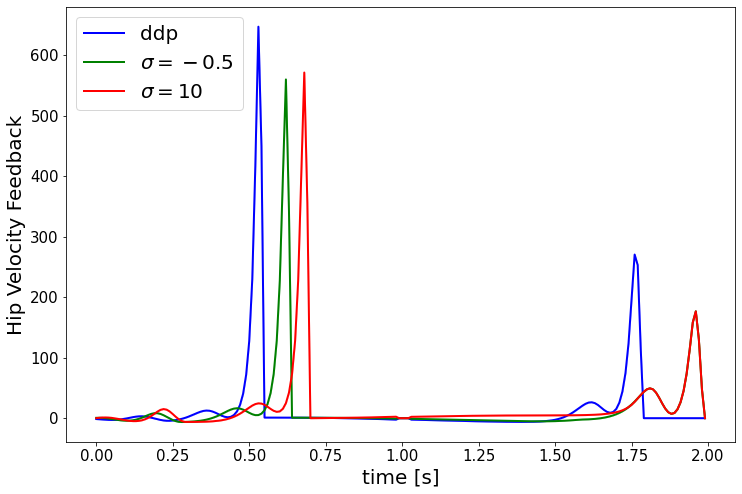

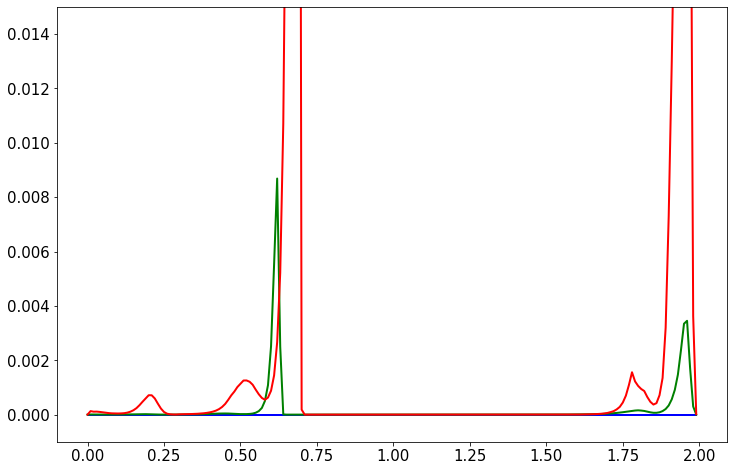

In [27]:
means = [ddp_Ksim_mean[:,2], averse_Ksim_mean[:,2], seeking_Ksim_mean[:,2]]
stds = [ddp_Ksim_std[:,2], averse_Ksim_std[:,2], seeking_Ksim_std[:,2]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
        
plot_feedback_statistics(means, stds, "Hip Velocity Feedback", labels, True, True)

colors = ["b", "g", "r"]
plt.figure("Hip Velocity feedback deviation", figsize=(12,8))
plt.ylim((-.001, .015))
for i in range(3):
    plt.plot(time_array[:-1], stds[i], colors[i], linewidth=2., label=labels[i])
plt.xticks(fontsize=15.)
plt.yticks(fontsize=15.)
plt.savefig("Hip Velocity feedback deviation.pdf")
# plt.legend(loc='upper left', fontsize=20.)

In [ ]:
means = [ddp_Ksim_mean[:,3], averse_Ksim_mean[:,3], seeking_Ksim_mean[:,3]]
stds = [ddp_Ksim_std[:,3], averse_Ksim_std[:,3], seeking_Ksim_std[:,3]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
        
plot_feedback_statistics(means, stds, "Foot Velocity Feedback", labels, True, True)

colors = ["b", "g", "r"]
plt.figure("Foot Velocity feedback deviation", figsize=(12,8))
# plt.ylim((-.001, .015))
for i in range(3):
    plt.plot(time_array[:-1], stds[i], colors[i], linewidth=2., label=labels[i])
plt.savefig("Foot Velocity feedback deviation.pdf")

# Some Table Results

In [28]:
print("DDP Maximum Tracking Error Average")
for i in range(4):
    print(np.amax(ddp_tracking_mean[:,i]))
    
print("DDP Maximum Tracking Error STD")
for i in range(4):
    print(np.amax(ddp_tracking_std[:,i]))
    
    
print("Averse Maximum Tracking Error Average")
for i in range(4):
    print(np.amax(averse_tracking_mean[:,i]))
    
print("Averse Maximum Tracking Error STD")
for i in range(4):
    print(np.amax(averse_tracking_std[:,i]))
    
print("Seeking Maximum Tracking Error Average")
for i in range(4):
    print(np.amax(seeking_tracking_mean[:,i]))
    
print("Seeking Maximum Tracking Error STD")
for i in range(4):
    print(np.amax(seeking_tracking_std[:,i]))
    


DDP Maximum Tracking Error Average
0.36255226877853
0.34604245631114483
3.848553219342896
2.345404541763345
DDP Maximum Tracking Error STD
0.25221084721456655
0.13599211349841628
1.8096900753319725
1.2693141726332953
Averse Maximum Tracking Error Average
0.32574613197015384
0.3169752955232909
3.4377339604707
2.2354425560745663
Averse Maximum Tracking Error STD
0.22910138415442274
0.11557356607972127
1.6458400652548868
0.7491698642109749
Seeking Maximum Tracking Error Average
0.41394707759076554
0.3621036642639019
3.0728239906060772
3.9204643043023215
Seeking Maximum Tracking Error STD
0.23603664850556377
0.13707176089051562
1.6000184173584264
1.3832587008314776


In [29]:
print("DDP Maximum Hip Height Average")
print(np.amax(ddp_xsim_mean[:,0]))
        
print("Averse Maximum Hip Height Average")
print(np.amax(averse_xsim_mean[:,0]))

print("Seeking Maximum Hip Height Average")
print(np.amax(seeking_xsim_mean[:,0]))


print("DDP Maximum Foot Height Average")
print(np.amax(ddp_xsim_mean[:,1]))
        
print("Averse Maximum Foot Height Average")
print(np.amax(averse_xsim_mean[:,1]))

print("Seeking Maximum Foot Height Average")
print(np.amax(seeking_xsim_mean[:,1]))
    

print("DDP Maximum takeoff force Average")
print(np.amax(ddp_fsim_mean[:100]))
        
print("Averse Maximum takeoff force Average")
print(np.amax(averse_fsim_mean[:100]))

print("Seeking Maximum takeoff force Average")
print(np.amax(seeking_fsim_mean[:100]))
    
    
print("DDP Maximum landing force Average")
print(np.amax(ddp_fsim_mean[100:]))
        
print("Averse Maximum landing force Average")
print(np.amax(averse_fsim_mean[100:]))

print("Seeking Maximum landing force Average")
print(np.amax(seeking_fsim_mean[100:]))


DDP Maximum Hip Height Average
1.882833313463128
Averse Maximum Hip Height Average
2.0021545675751184
Seeking Maximum Hip Height Average
2.378796425099926
DDP Maximum Foot Height Average
0.6980723347050002
Averse Maximum Foot Height Average
0.801352174724599
Seeking Maximum Foot Height Average
0.8168487622818441
DDP Maximum takeoff force Average
89.18944031062772
Averse Maximum takeoff force Average
109.86229811032699
Seeking Maximum takeoff force Average
104.87195130436713
DDP Maximum landing force Average
115.45740894538561
Averse Maximum landing force Average
103.7646776124616
Seeking Maximum landing force Average
302.4331763509825


# Visualization

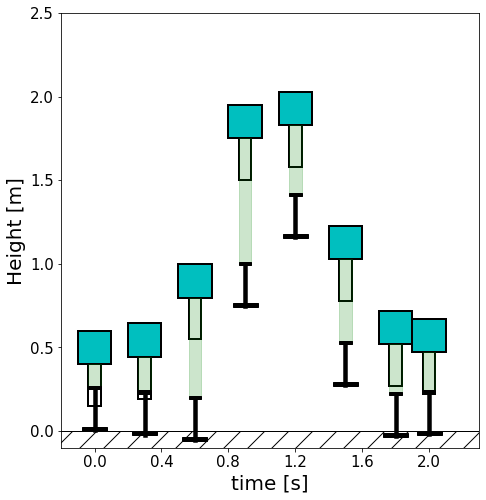

In [30]:
ax = None  

if ax is None:
    fig1 = plt.figure("visualization", figsize=(12,8))
    ax = fig1.add_subplot(111)
else:
    ax.clear()

endpoint = 2.1 
start_time_offset = 0.

ax.set_xlim([-0.2, endpoint + 0.2])
ax.set_ylim([-0.1, 2.5])

xticks = np.round(np.arange(0., 2.1, .4),4).tolist()
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_aspect('equal', 'box')


# Plot the ground.
ax.add_patch(m_patches.Rectangle(
    (-10, -0.1), 99., 0.1,
    fill=False,
    hatch='/',
))

vizz = visualize.PenumaticHopper1DViz([], [])

pts = [0, 30, 60, 90, 120, 150, 180, 200]
for i in pts:
    vizz.plot_index(i*plan_dt, averse_xsim_mean[i,0], averse_xsim_mean[i,1], ax)
plt.xlabel("time [s]", fontsize=20.)
title = "Height [m]"
plt.ylabel(title, fontsize=20.)
plt.xticks(fontsize=15.)
plt.yticks(fontsize=15.)
title = "visualization"
plt.savefig(title+".pdf")

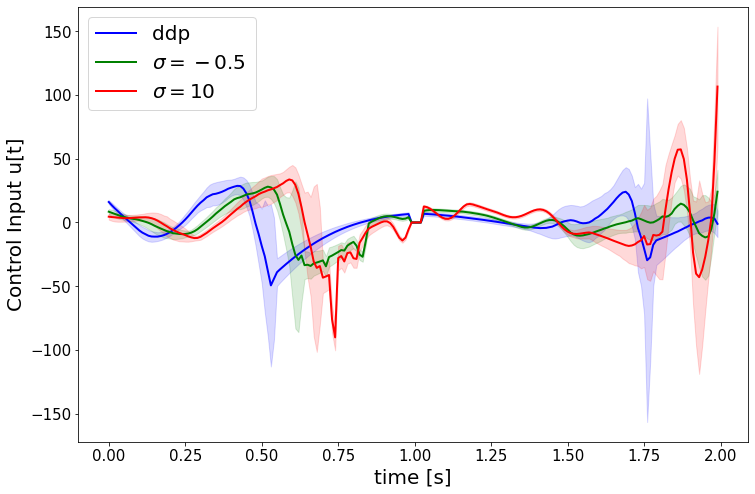

In [31]:
#control input plots 

means = [ddp_usim_mean[:,0], averse_usim_mean[:,0], seeking_usim_mean[:,0]]
stds = [ddp_usim_std[:,0], averse_usim_std[:,0], seeking_usim_std[:,0]]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]
        
plot_feedback_statistics(means, stds, "Control Input u[t]", labels, True, True)

# colors = ["b", "g", "r"]
# plt.figure("Foot Velocity feedback deviation", figsize=(12,8))
# # plt.ylim((-.001, .015))
# for i in range(3):
#     plt.plot(time_array[:-1], stds[i], colors[i], linewidth=2., label=labels[i])
# plt.savefig("Foot Velocity feedback deviation.pdf")

In [32]:
for i in range(3):
    print(np.amax(means[i]))
    
for i in range(3):
    print(np.amax(stds[i]))

28.73405538910578
28.100538446361444
106.61356266044669
126.90210049217481
57.65983836710165
75.8832830300831


In [35]:
# plot plans 

def plot_plan(hip_plans, foot_plans, labels, save=False): 
    colors = ["b", "g", "r"]
    for i in range(len(labels)):
        title = labels[i] + " Plan"
        plt.figure(title, figsize=(12,8))
        plt.ylim(-.25, 2.5)
        xaxis_array = plan_dt*np.arange(hip_plans[0].shape[0])
        ax = plt.axes()
        ax.add_patch(m_patches.Rectangle(
        (-.01, -0.2),2., .2,
        fill=False,
        hatch='/',
        ))
#         for i in range(len(means)):
        plt.plot(xaxis_array, hip_plans[i], color=colors[i], linewidth=2., label=labels[i])
        plt.plot(xaxis_array, foot_plans[i],'--', color=colors[i],linewidth=2.)
            
        plt.xlabel("time [s]", fontsize=20.)
        plt.xticks(fontsize=15.)
        plt.yticks(fontsize=15.)
        plt.ylabel(title, fontsize=20.)
#         if legends:
        plt.legend(loc='upper left', fontsize=20.)
        if save:
            plt.savefig(title+".pdf")

    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an a

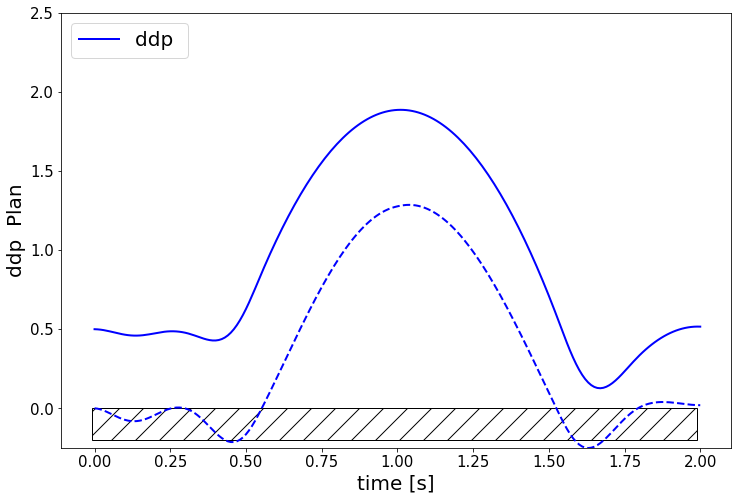

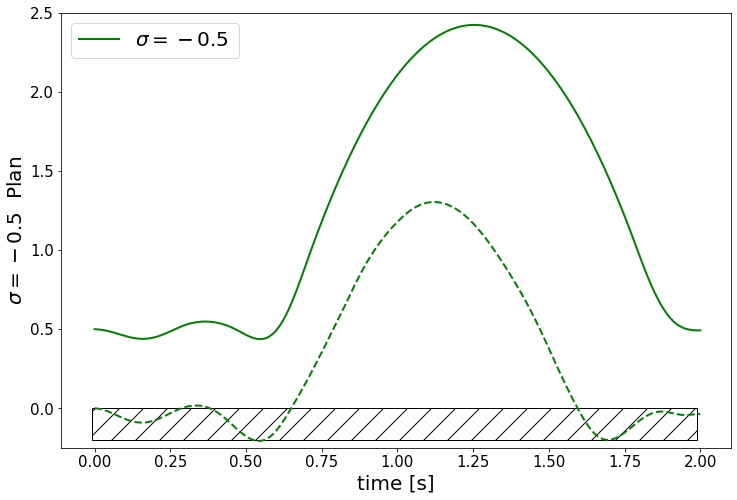

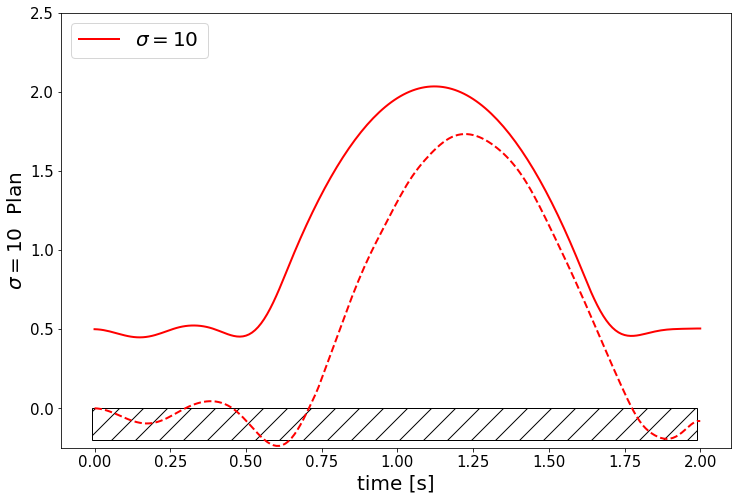

In [36]:
hip_plans = [ddp_xplan[:,0], seeking_xplan[:,0], averse_xplan[:,0]]
foot_plans = [ddp_foot_planned, averse_foot_planned, seeking_foot_planned]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]

plot_plan(hip_plans, foot_plans, labels, True)

In [37]:
ddp_costs_sim = np.load("ddp_cost_stats.npy")
averse_costs_sim = np.load("averse_cost_stats.npy")
seeking_costs_sim = np.load("seeking_cost_stats.npy")

print(ddp_costs_sim.shape)
print(averse_costs_sim.shape)
print(seeking_costs_sim.shape)

(1000, 201)
(1000, 201)
(1000, 201)


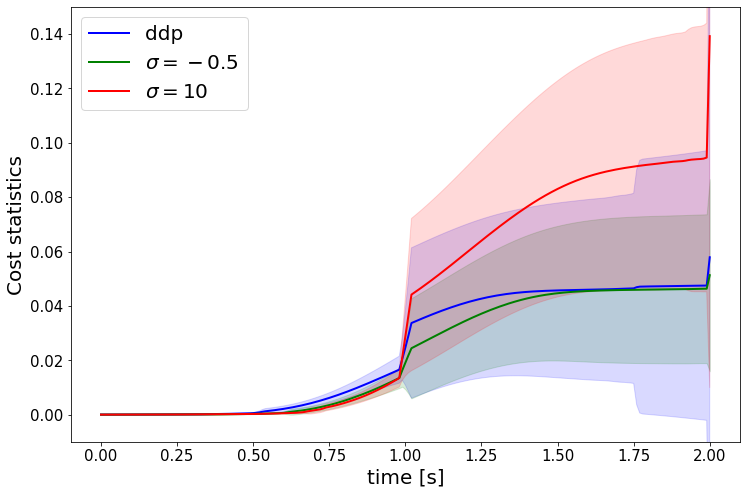

In [44]:
ddp_cost_mean = np.mean(ddp_costs_sim, axis=0)
averse_cost_mean = np.mean(averse_costs_sim, axis=0)
seeking_cost_mean = np.mean(seeking_costs_sim, axis=0)


ddp_cost_std = np.std(ddp_costs_sim, axis=0)
averse_cost_std = np.std(averse_costs_sim, axis=0)
seeking_cost_std = np.std(seeking_costs_sim, axis=0)

means = [ddp_cost_mean, averse_cost_mean, seeking_cost_mean]
stds = [ddp_cost_std, averse_cost_std, seeking_cost_std]
labels = ["ddp ", "$\sigma= -0.5$ ", "$\sigma= 10.$ "]


title = "Cost statistics"
plt.figure(title, figsize=(12,8))
plt.ylim(-.01, .15)
xaxis_array = plan_dt*np.arange(horizon+1)
colors = ["b", "g", "r"]
for i in range(3):
    plt.plot(xaxis_array, means[i], alpha=1., color=colors[i], linewidth=2., label=labels[i])
    plt.fill_between(xaxis_array, means[i]-stds[i], means[i]+stds[i], alpha=.15, color=colors[i])
plt.xlabel("time [s]", fontsize=20.)
plt.ylabel(title, fontsize=20.)
plt.xticks(fontsize=15.)
plt.yticks(fontsize=15.)

plt.legend(loc='upper left', fontsize=20.)

plt.savefig(title+".pdf")



In [45]:
for i in range(3):
    print(labels[i]+" total cost = ", means[i][-1])
    print(labels[i]+" max Std = ", np.amax(stds[i]))

ddp  total cost =  0.05789583322639703
ddp  max Std =  0.13172235081453637
$\sigma= -0.5$  total cost =  0.05129949879670564
$\sigma= -0.5$  max Std =  0.03533229136249411
$\sigma= 10.$  total cost =  0.13924527284153757
$\sigma= 10.$  max Std =  0.12927575802289143
